In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
# This is for the fonts
from matplotlib import pyplot as plt, font_manager as fm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
milkData = pd.read_csv('/content/drive/MyDrive/milknew.csv')

In [ ]:
milkData.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
milkData.shape

(1059, 8)

In [ ]:
milkData.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [ ]:
milkData.dropna()
milkData.shape

(1059, 8)

In [ ]:
milkData.duplicated().sum()

976

In [ ]:
milkData.loc[milkData.duplicated(),:]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [ ]:
milkData.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [ ]:
# checking the number of unique rows in each feature
milkData.nunique().sort_values()

Taste          2
Odor           2
Fat            2
Turbidity      2
Grade          3
Colour         9
pH            16
Temprature    17
dtype: int64

In [ ]:
milkData.info

<bound method DataFrame.info of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]>

In [ ]:
# Convert the dictionary into DataFrame
milkData1= pd.DataFrame(milkData)
  
# Remove column name 'A'
milkData2=milkData.drop(['Grade'], axis=1)

In [ ]:
milkData2

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


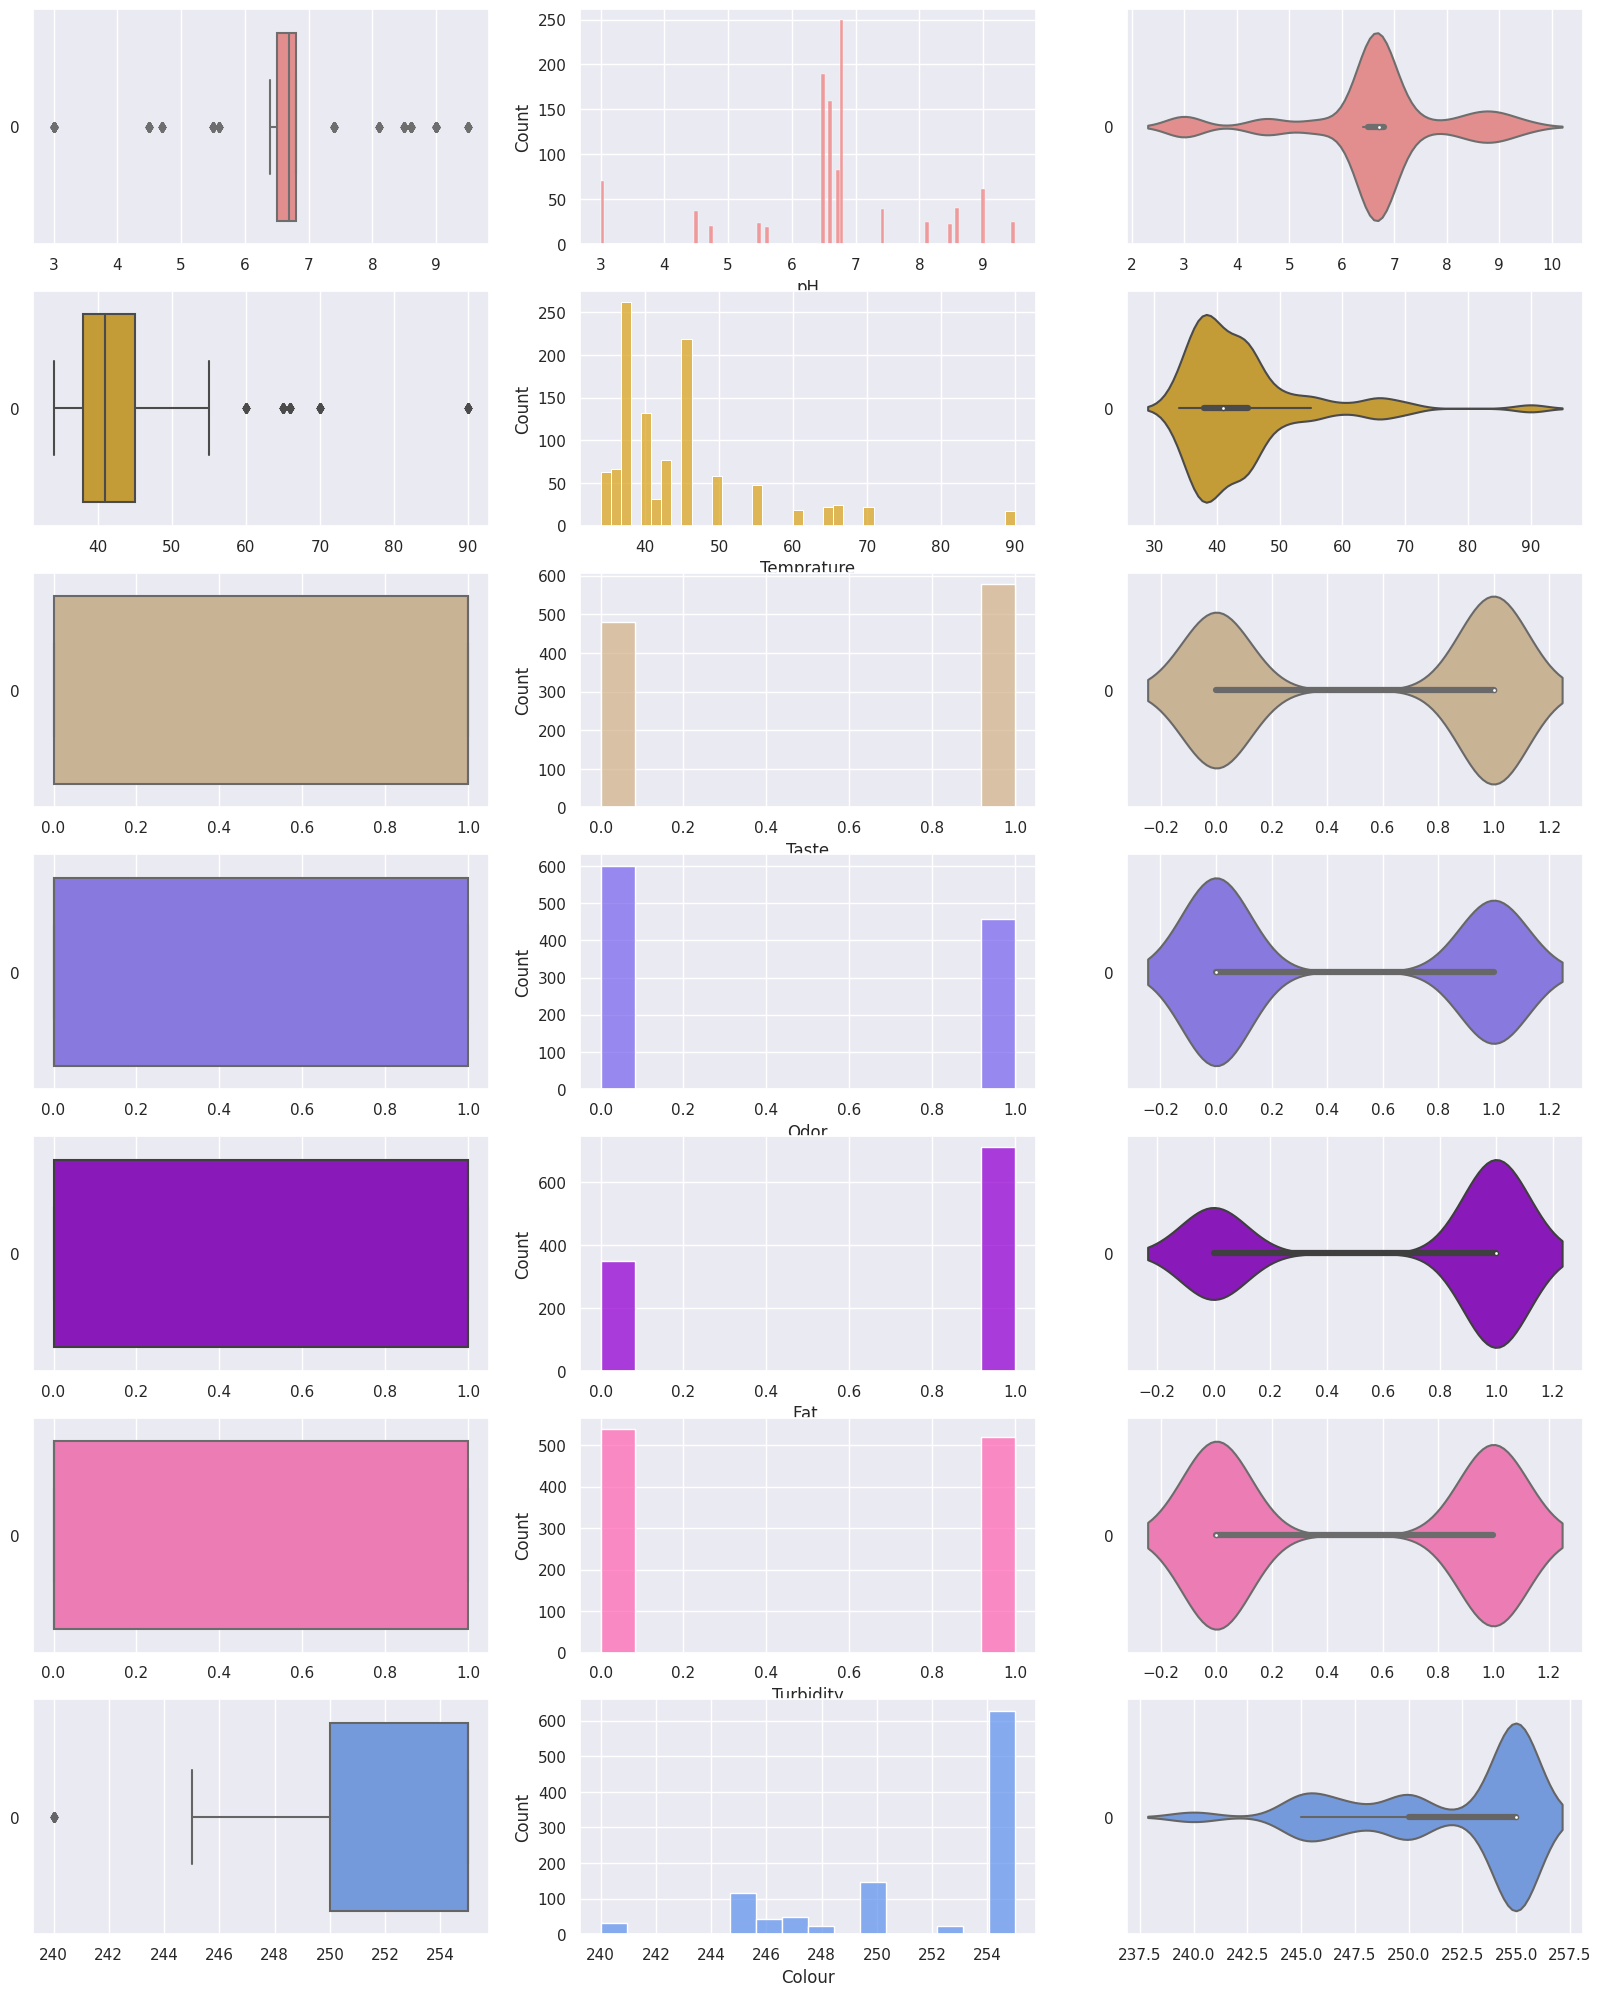

In [ ]:
# Draw the distributions of all variables in boxplots, histograms, and violin plots.
f, axes = plt.subplots(7, 3, figsize=(20, 25))
colors = ["lightcoral", "goldenrod", "tan", "mediumslateblue", "darkviolet", "hotpink", "cornflowerblue", "dodgerblue", "royalblue", "mediumaquamarine", "teal", "firebrick"]

count = 0
for var in milkData2:
    sb.boxplot(data=milkData2[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=milkData2[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=milkData2[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

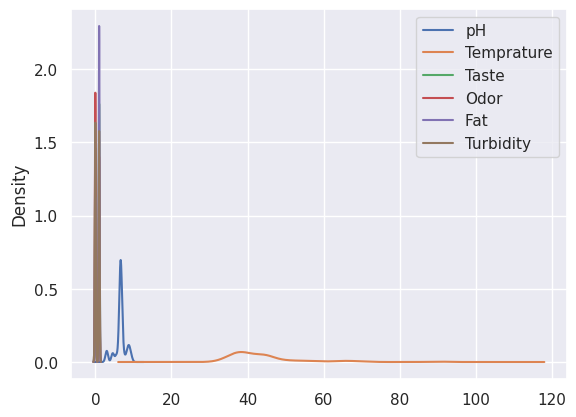

In [ ]:
cols = milkData.columns[:6]
densityplot = milkData[cols].plot(kind='density')

In [ ]:
#min, max , average for temperature
print('The lowest temperature in the Milk is '+ str(milkData['Temprature'].min()))
print('The highest temperature in the Milk is '+ str(milkData['Temprature'].max()))
print('The average temperature in the Milk is '+ str(round(milkData['Temprature'].mean(),3)))
#min, max, average for PH 
print('The lowest pH in the Milk is '+ str(milkData['pH'].min()))
print('The highest pH in the Milk is '+ str(milkData['pH'].max()))
print('The average pH in the Milk is '+ str(round(milkData['pH'].mean(),3)))
#min,max,averagr for colour
print('The lowest Colour in the Milk is '+ str(milkData['Colour'].min()))
print('The highest Colour in the Milk is '+ str(milkData['Colour'].max()))
print('The average Colour in the Milk is '+ str(round(milkData['Colour'].mean(),3)))

The lowest temperature in the Milk is 34
The highest temperature in the Milk is 90
The average temperature in the Milk is 44.227
The lowest pH in the Milk is 3.0
The highest pH in the Milk is 9.5
The average pH in the Milk is 6.63
The lowest Colour in the Milk is 240
The highest Colour in the Milk is 255
The average Colour in the Milk is 251.84


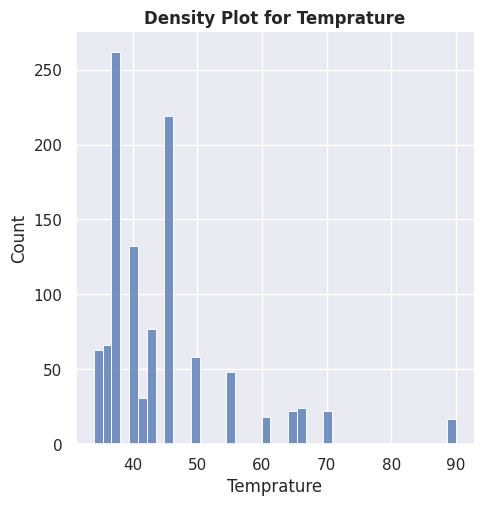

In [ ]:
sb.displot(milkData['Temprature'], color = 'b')
plt.title("Density Plot for Temprature",fontname="DejaVu Sans", size=12 ,fontweight="bold" )
plt.show()

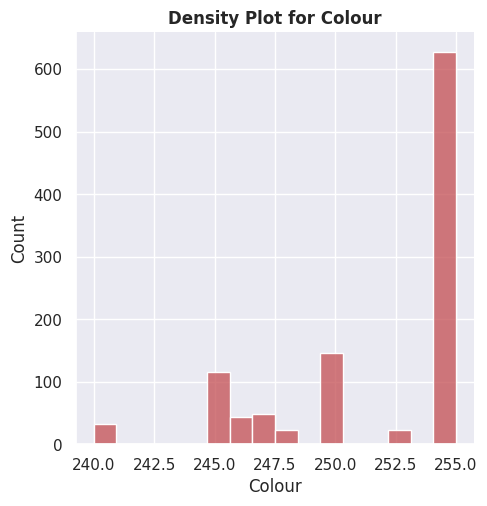

In [ ]:
sb.displot(milkData['Colour'], color = 'r')
plt.title("Density Plot for Colour",fontname="DejaVu Sans", size=12 ,fontweight="bold" )
plt.show()

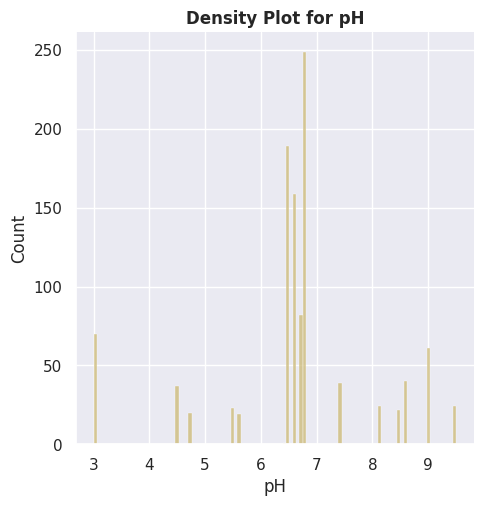

In [ ]:
sb.displot(milkData['pH'], color = 'y')
plt.title("Density Plot for pH",fontname="DejaVu Sans", size=12 ,fontweight="bold" )
plt.show()

In [ ]:
milkData.Grade.value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

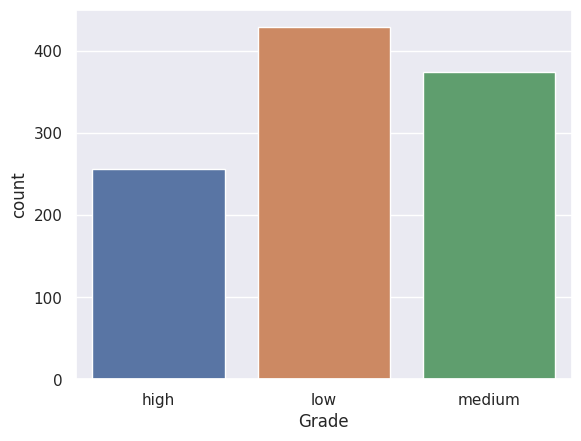

In [ ]:
sb.countplot(x='Grade',data=milkData)
plt.show()


                  pH  Temprature     Taste      Odor      Fat   Turbidity  \
pH          1.000000    0.244684 -0.064053 -0.081331 -0.093429   0.048384   
Temprature  0.244684    1.000000 -0.109792 -0.048870  0.024073   0.185106   
Taste      -0.064053   -0.109792  1.000000  0.017582  0.324149   0.055755   
Odor       -0.081331   -0.048870  0.017582  1.000000  0.314505   0.457935   
Fat        -0.093429    0.024073  0.324149  0.314505  1.000000   0.329264   
Turbidity   0.048384    0.185106  0.055755  0.457935  0.329264   1.000000   
Colour     -0.164565   -0.008511 -0.082654 -0.039361  0.114151   0.136436   

              Colour  
pH         -0.164565  
Temprature -0.008511  
Taste      -0.082654  
Odor       -0.039361  
Fat         0.114151  
Turbidity   0.136436  
Colour      1.000000  


<Axes: >

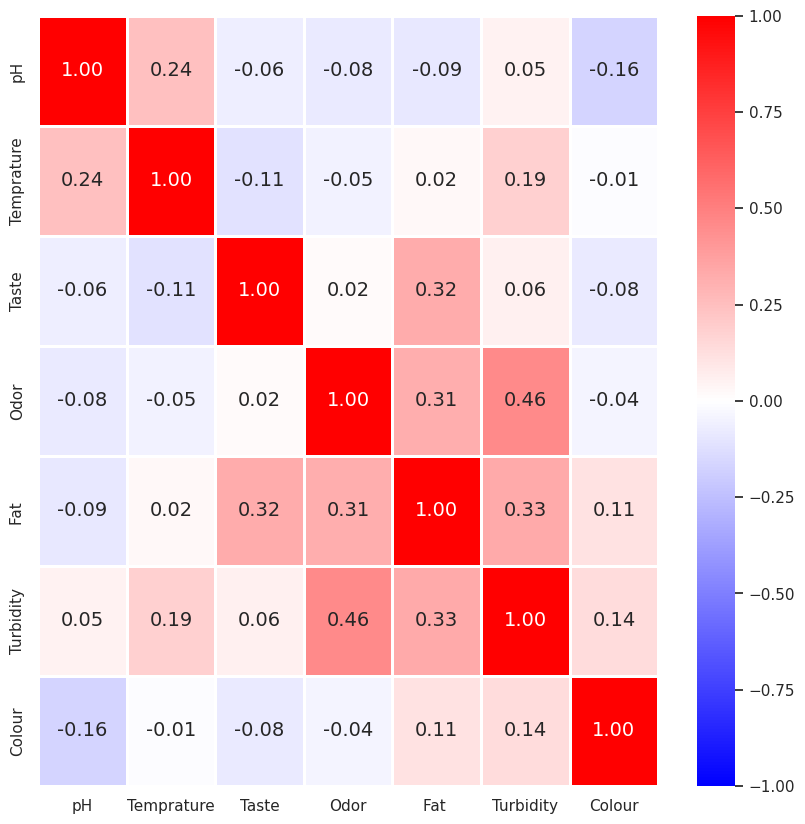

In [ ]:
# Correlation Matrix Values
print(milkData.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(milkData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "bwr")

In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(X_train)
Train_X_std = pd.DataFrame(Train_X_std)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(X_test)
Test_X_std = pd.DataFrame(Test_X_std)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,0,1,2,3,4,5,6
count,7.410000e+02,7.410000e+02,7.410000e+02,7.410000e+02,7.410000e+02,7.410000e+02,7.410000e+02
mean,6.952004e-17,-2.397243e-18,1.438346e-17,-6.712280e-17,-4.171202e-16,-2.684912e-16,2.001698e-16
std,1.000675e+00,1.000675e+00,1.000675e+00,1.000675e+00,1.000675e+00,1.000675e+00,1.000675e+00
min,-2.560264e+00,-1.038104e+00,-1.071366e+00,-8.887379e-01,-1.500000e+00,-1.012220e+00,-2.864628e+00
25%,-8.374428e-02,-6.328167e-01,-1.071366e+00,-8.887379e-01,-1.500000e+00,-1.012220e+00,-4.704375e-01
50%,5.777114e-02,-3.288514e-01,9.333874e-01,-8.887379e-01,6.666667e-01,9.879271e-01,7.266579e-01
75%,1.285289e-01,7.643572e-02,9.333874e-01,1.125191e+00,6.666667e-01,9.879271e-01,7.266579e-01
max,2.038987e+00,4.635915e+00,9.333874e-01,1.125191e+00,6.666667e-01,9.879271e-01,7.266579e-01



                                Standardardization on Testing set                                


,0,1,2,3,4,5,6
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,0.027732,-0.006406,0.082313,-0.059100,-0.150943,-0.100203,-0.099263
std,0.967244,1.075417,0.992454,0.992790,1.051894,0.997760,1.097790
min,-2.560264,-1.038104,-1.071366,-0.888738,-1.500000,-1.012220,-2.864628
25%,-0.083744,-0.632817,-1.071366,-0.888738,-1.500000,-1.012220,-1.128840
50%,0.057771,-0.379512,0.933387,-0.888738,0.666667,-1.012220,0.726658
75%,0.128529,0.076436,0.933387,1.125191,0.666667,0.987927,0.726658
max,2.038987,4.635915,0.933387,1.125191,0.666667,0.987927,0.726658


In [ ]:
pd.DataFrame(milkData.groupby("Odor")["Turbidity"].mean())

,Turbidity
Odor,
0,0.291181
1,0.753275


In [ ]:
pd.DataFrame(milkData.groupby('Fat ')['Taste'].mean())

,Taste
Fat,
0,0.316092
1,0.659634


In [ ]:
pd.DataFrame(milkData.groupby('pH')['Temprature'].mean())

,Temprature
pH,
3.0,40.000000
4.5,48.702703
4.7,38.000000
5.5,45.000000
5.6,50.000000
6.4,45.000000
6.5,37.746032
6.6,41.125786
6.7,42.951220


In [ ]:
milkData.isna().any()

pH            False
Temprature    False
Taste         False
Odor          False
Fat           False
Turbidity     False
Colour        False
Grade         False
dtype: bool

In [ ]:
milkData.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
milkData['Grade']= label_encoder.fit_transform(milkData['Grade'])

In [ ]:
milkData.head()
# The Grade of milk has hence transformed into numerical variables 

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [ ]:
#These are the libraries needed 

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix 

In [ ]:
#splinting into train and test 
x= milkData.drop(['Grade'],axis=1)
y= milkData['Grade']
# Splitting out dataset into train and test set with test size 30% of entire dataset
# Standardization of data 

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)
 
# Generating the standardized values of X and y
x=PredictorScalerFit.transform(x)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (741, 7)
X Test  :  (318, 7)
Y Train :  (741,)
Y Test  :  (318,)


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model on the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
#This is for the test dataset 
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
X_test_predict_lr =model.predict(X_test)
print('The accuracy for Logistic Regression model is (Test Dataset) ', metrics.accuracy_score(X_test_predict_lr,y_test))
#This is for the train dataset 
model = LogisticRegression()
model.fit(X_test_scaled,y_test)
X_train_predict_lr =model.predict(X_train)
print('The accuracy for Logistic Regression model is (Train Dataset) ',metrics.accuracy_score(X_train_predict_lr,y_train))

The accuracy for Logistic Regression model is (Test Dataset)  0.8522012578616353
The accuracy for Logistic Regression model is (Train Dataset)  0.8259109311740891


In [ ]:
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(max_iter = 20000)
Log_Reg.fit(X_train, y_train.values.ravel())
training_prediction = Log_Reg.predict(X_train)
testing_prediction = Log_Reg.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = "weighted")
training_precision = precision_score(y_train, training_prediction, average = "weighted")
training_recall = recall_score(y_train, training_prediction, average = "weighted")

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = "weighted")
testing_precision = precision_score(y_test, testing_prediction, average = "weighted")
testing_recall = recall_score(y_test, testing_prediction, average = "weighted")


print("AL : Logistic Regression (30%)")
print("\n\n")
print("Training Model Performance Check")
print("Accuracy Score : {:.4f}".format(training_accuracy))
print("F1 Score : {:.4f}".format(training_f1))
print("Precision Score : {:.4f}".format(training_precision))
print("Recall Score : {:.4f}".format(training_recall))

print("\n\n")
print("Testing Model Performace Check")
print("Accuracy Score : {:.4f}".format(testing_accuracy))
print("F1 Score : {:.4f}".format(testing_f1))
print("Precision Score : {:.4f}".format(testing_precision))
print("Recall Score : {:.4f}".format(testing_recall))

AL : Logistic Regression (30%)



Training Model Performance Check
Accuracy Score : 0.8529
F1 Score : 0.8550
Precision Score : 0.8610
Recall Score : 0.8529



Testing Model Performace Check
Accuracy Score : 0.8491
F1 Score : 0.8513
Precision Score : 0.8582
Recall Score : 0.8491


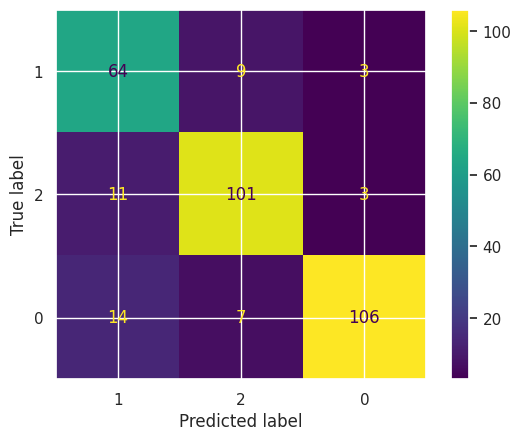

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,X_test_predict_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,0])
cm_display.plot()
#plt.xticks([])
#plt.yticks([])
plt.axis()
plt.show()

In [ ]:
#This is for the test dataset 
model=GaussianNB()
model.fit(X_train,y_train)
X_test_predict_gnb =model.predict(X_test)
print('The accuracy of the Gaussian Naive Bayes model (Test Dataset) is',metrics.accuracy_score(X_test_predict_gnb,y_test))
#This is for the train dataset 
model=GaussianNB()
model.fit(X_test,y_test)
X_train_predict_gnb =model.predict(X_train)
print('The accuracy of the Gaussian Naive Bayes model (Train Dataset) is',metrics.accuracy_score(X_train_predict_gnb,y_train))

The accuracy of the Gaussian Naive Bayes model (Test Dataset) is 0.9025157232704403
The accuracy of the Gaussian Naive Bayes model (Train Dataset) is 0.8272604588394062


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
training_prediction = gnb.predict(X_train)
testing_prediction = gnb.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = "weighted")
training_precision = precision_score(y_train, training_prediction, average = "weighted")
training_recall = recall_score(y_train, training_prediction, average = "weighted")

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = "weighted")
testing_precision = precision_score(y_test, testing_prediction, average = "weighted")
testing_recall = recall_score(y_test, testing_prediction, average = "weighted")


print("AL : Gaussian NB (30%)")
print("\n\n")
print("Training Model Performance Check")
print("Accuracy Score : {:.4f}".format(training_accuracy))
print("F1 Score : {:.4f}".format(training_f1))
print("Precision Score : {:.4f}".format(training_precision))
print("Recall Score : {:.4f}".format(training_recall))

print("\n\n")
print("Testing Model Performace Check")
print("Accuracy Score : {:.4f}".format(testing_accuracy))
print("F1 Score : {:.4f}".format(testing_f1))
print("Precision Score : {:.4f}".format(testing_precision))
print("Recall Score : {:.4f}".format(testing_recall))

AL : Gaussian NB (30%)



Training Model Performance Check
Accuracy Score : 0.9190
F1 Score : 0.9194
Precision Score : 0.9205
Recall Score : 0.9190



Testing Model Performace Check
Accuracy Score : 0.9025
F1 Score : 0.9024
Precision Score : 0.9023
Recall Score : 0.9025


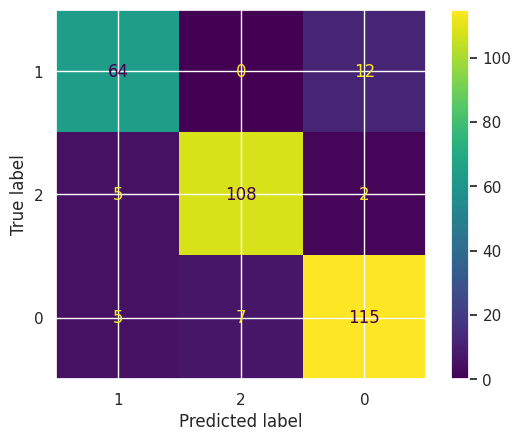

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,X_test_predict_gnb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,0])
cm_display.plot()
#plt.xticks([])
#plt.yticks([])
plt.axis()
plt.show()

In [ ]:
#Suport vector machine
#This is for the test dataset 
model=SVC()
model.fit(X_train,y_train)
X_test_predict_sv =model.predict(X_test)
training_data_accuracy = metrics.accuracy_score(X_test_predict_sv, y_test)
print('The accuracy of the Support Vector Machine model (Train Dataset) is', training_data_accuracy)

X_train_predict_sv =model.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_predict_sv, y_train)
print('The accuracy of the Support Vector Machine model (Test Dataset) is ', training_data_accuracy)

The accuracy of the Support Vector Machine model (Train Dataset) is 0.940251572327044
The accuracy of the Support Vector Machine model (Test Dataset) is  0.9581646423751687


In [ ]:
from sklearn import svm

Support_Vector = svm.SVC()
Support_Vector.fit(X_train, y_train)
training_prediction = Support_Vector.predict(X_train)
testing_prediction = Support_Vector.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = "weighted")
training_precision = precision_score(y_train, training_prediction, average = "weighted")
training_recall = recall_score(y_train, training_prediction, average = "weighted")

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = "weighted")
testing_precision = precision_score(y_test, testing_prediction, average = "weighted")
testing_recall = recall_score(y_test, testing_prediction, average = "weighted")


print("AL : Support Vector Machine (30%)")
print("\n\n")
print("Training Model Performance Check")
print("Accuracy Score : {:.4f}".format(training_accuracy))
print("F1 Score : {:.4f}".format(training_f1))
print("Precision Score : {:.4f}".format(training_precision))
print("Recall Score : {:.4f}".format(training_recall))

print("\n\n")
print("Testing Model Performace Check")
print("Accuracy Score : {:.4f}".format(testing_accuracy))
print("F1 Score : {:.4f}".format(testing_f1))
print("Precision Score : {:.4f}".format(testing_precision))
print("Recall Score : {:.4f}".format(testing_recall))

AL : Support Vector Machine (30%)



Training Model Performance Check
Accuracy Score : 0.9582
F1 Score : 0.9584
Precision Score : 0.9586
Recall Score : 0.9582



Testing Model Performace Check
Accuracy Score : 0.9403
F1 Score : 0.9409
Precision Score : 0.9426
Recall Score : 0.9403


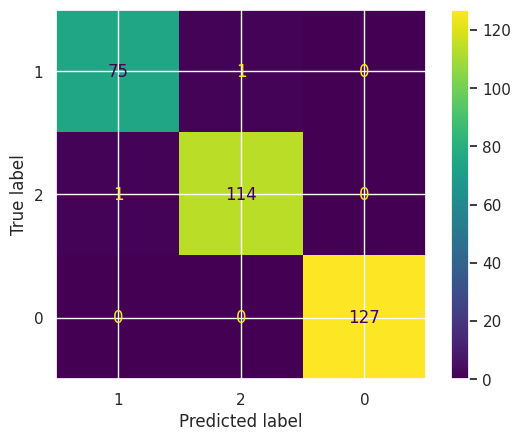

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,X_test_predict_dtc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,0])
cm_display.plot()
#plt.xticks([])
#plt.yticks([])
plt.axis()
plt.show()

In [ ]:
#This is for the train dataset 
model = KNeighborsClassifier()
model.fit(X_test_scaled,y_test)
X_train_predict_kn =model.predict(X_train)
print('The accuracy for KNeighborsClassifier model is (Train Dataset) ',metrics.accuracy_score(X_train_predict_kn,y_train))

#This is for the test dataset 
model = KNeighborsClassifier()
model.fit(X_train_scaled,y_train)
X_test_predict_kn =model.predict(X_test)
print('The accuracy for KNeighborsClassifier model is (Test Dataset) ', metrics.accuracy_score(X_test_predict_kn,y_test))


The accuracy for KNeighborsClassifier model is (Train Dataset)  0.9568151147098516
The accuracy for KNeighborsClassifier model is (Test Dataset)  0.9937106918238994


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)


#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = "weighted")
training_precision = precision_score(y_train, training_prediction, average = "weighted")
training_recall = recall_score(y_train, training_prediction, average = "weighted")

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = "weighted")
testing_precision = precision_score(y_test, testing_prediction, average = "weighted")
testing_recall = recall_score(y_test, testing_prediction, average = "weighted")

print("AL: K-Nearest Neighbors (30%)")
print("\n\n")
print("Training Model Performance Check")
print("Accuracy Score : {:.4f}".format(training_accuracy))
print("F1 Score : {:.4f}".format(training_f1))
print("Precision Score : {:.4f}".format(training_precision))
print("Recall Score : {:.4f}".format(training_recall))

print("\n\n")
print("Testing Model Performace Check")
print("Accuracy Score : {:.4f}".format(testing_accuracy))
print("F1 Score : {:.4f}".format(testing_f1))
print("Precision Score : {:.4f}".format(testing_precision))
print("Recall Score : {:.4f}".format(testing_recall))

AL: K-Nearest Neighbors (30%)



Training Model Performance Check
Accuracy Score : 0.9973
F1 Score : 0.9973
Precision Score : 0.9973
Recall Score : 0.9973



Testing Model Performace Check
Accuracy Score : 0.9906
F1 Score : 0.9906
Precision Score : 0.9906
Recall Score : 0.9906


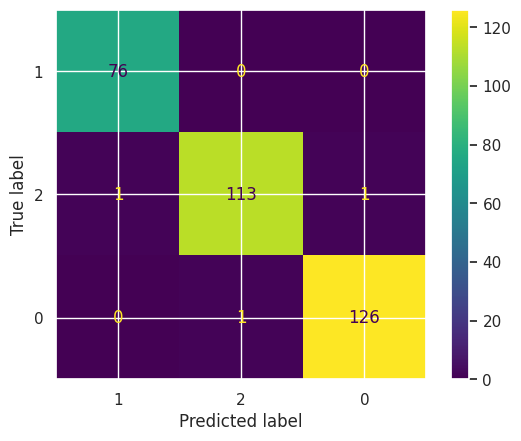

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,testing_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,0])
cm_display.plot()
plt.show()

In [ ]:
#Predictive Modeling

#Let us create first a table to store the results of various models 
import pandas as pd
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','SVM','GaussianNB'],
    ' Accuracy Score': [0.84,0.99,0.94,0.90],
    ' F1 Score': [0.85,0.99,0.94,0.90],
    ' Precision Score': [0.85,0.99,0.94,0.90],
    ' Recall Score': [0.84,0.99,0.94,0.90],
    'AUC-ROC score':[85,99,94,90]})

result_df = results.sort_values(by=' Accuracy Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Accuracy Score,F1 Score,Precision Score,Recall Score,AUC-ROC score
Model,,,,,
KNN,0.99,0.99,0.99,0.99,99
SVM,0.94,0.94,0.94,0.94,94
GaussianNB,0.90,0.90,0.90,0.90,90
Logistic Regression,0.84,0.85,0.85,0.84,85


                                    ML Algorithms Comparison                                    


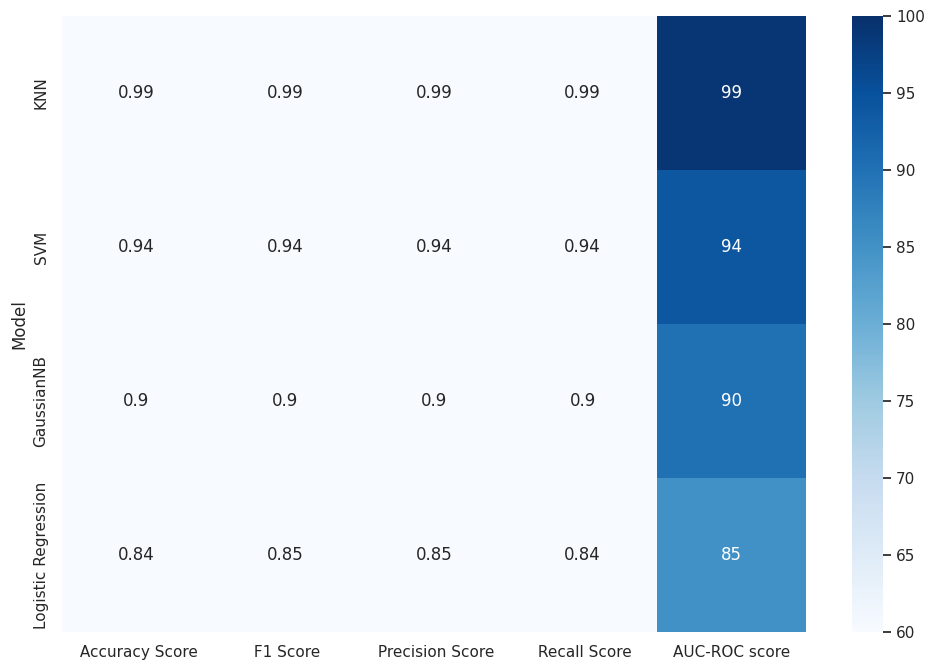

In [ ]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sb.heatmap(result_df, annot=True, vmin=60, vmax=100, cmap='Blues')
plt.show()